In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

**Exploratory Data Analysis**

In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


So we can see that there is skewness in applicant income and co applicant income and loan amount 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


***Check for duplicates***

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape 

(32536, 15)

There is no change in shape so there are no duplicates

***Check for null values***

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

***Separate categorical and numerical column***

In [10]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

In [11]:
categorical_cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [12]:
numerical_cols

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

***check for outliers***

Age                  Axes(0.125,0.53;0.227941x0.35)
Fnlwgt            Axes(0.398529,0.53;0.227941x0.35)
Education_num     Axes(0.672059,0.53;0.227941x0.35)
Capital_gain         Axes(0.125,0.11;0.227941x0.35)
Capital_loss      Axes(0.398529,0.11;0.227941x0.35)
Hours_per_week    Axes(0.672059,0.11;0.227941x0.35)
dtype: object

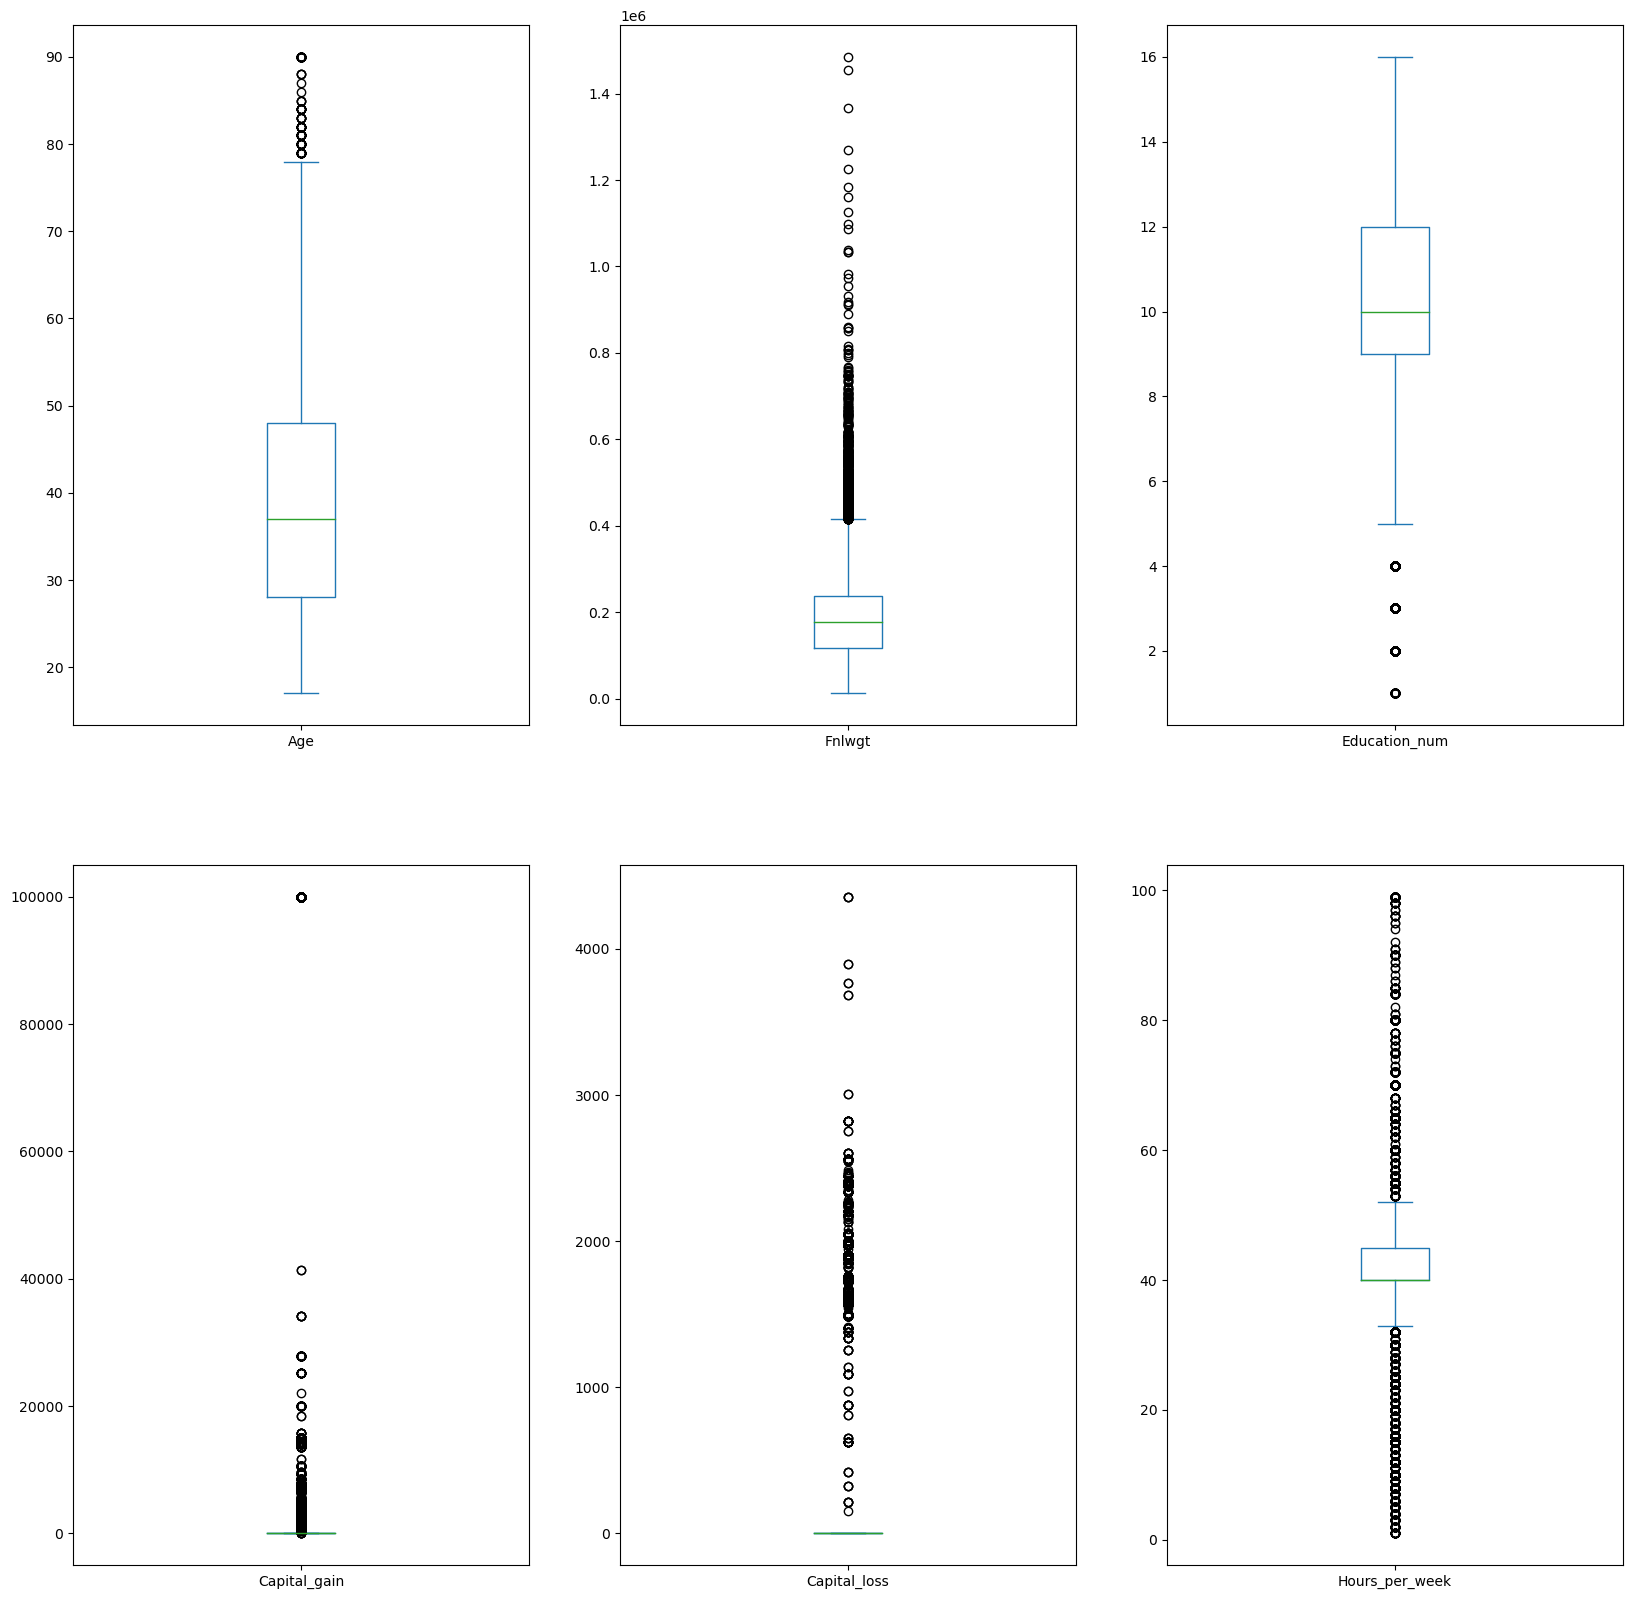

In [13]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(2,3),figsize=(20,20))

In [14]:
for i in df[numerical_cols]:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

-2.0
78.0
-60911.125
415735.875
4.5
16.5
0.0
0.0
0.0
0.0
32.5
52.5


Age                  Axes(0.125,0.653529;0.227941x0.226471)
Fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
Education_num     Axes(0.672059,0.653529;0.227941x0.226471)
Capital_gain         Axes(0.125,0.381765;0.227941x0.226471)
Capital_loss      Axes(0.398529,0.381765;0.227941x0.226471)
Hours_per_week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

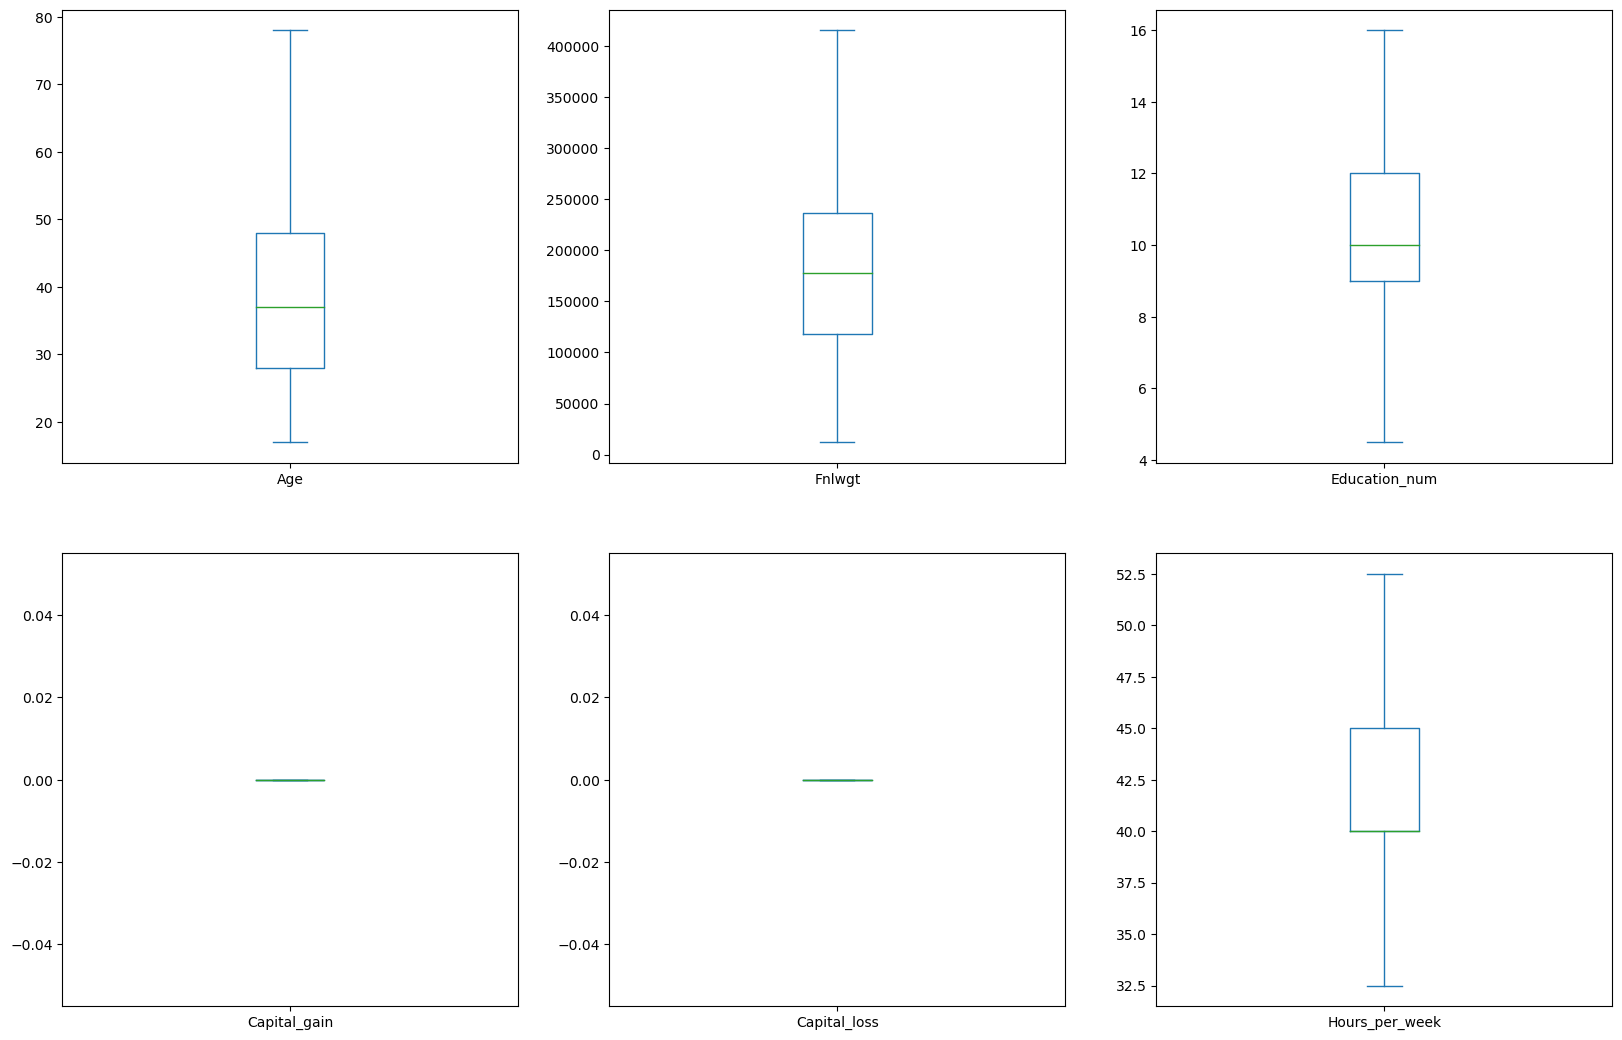

In [15]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(3,3),figsize=(20,20))

So the outliers which are present in some of the features are also removed

***check for skewness***

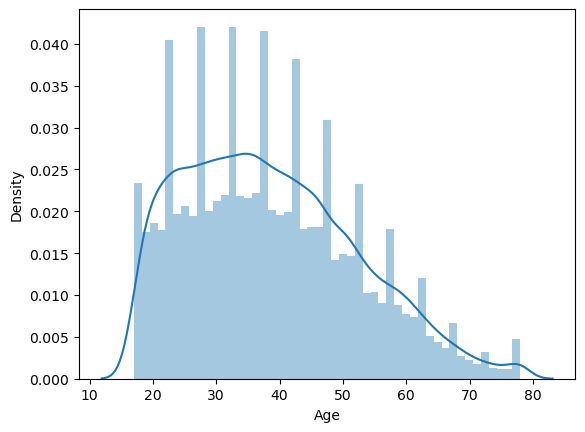

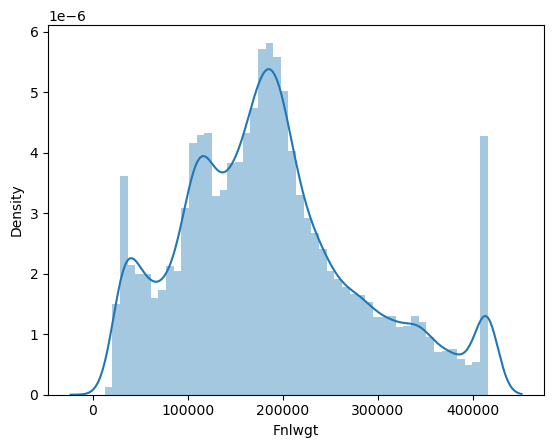

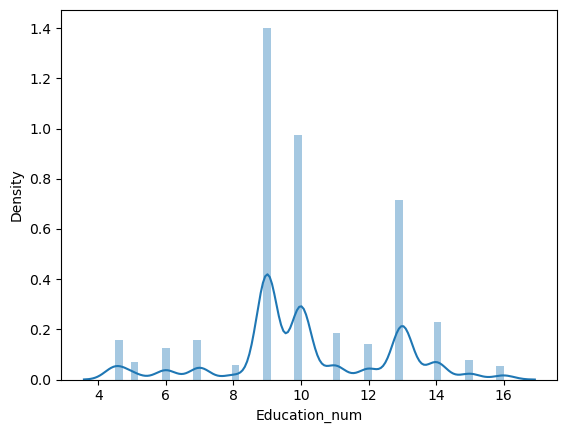

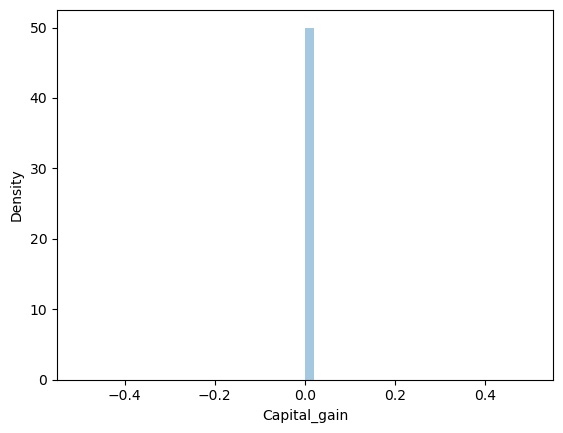

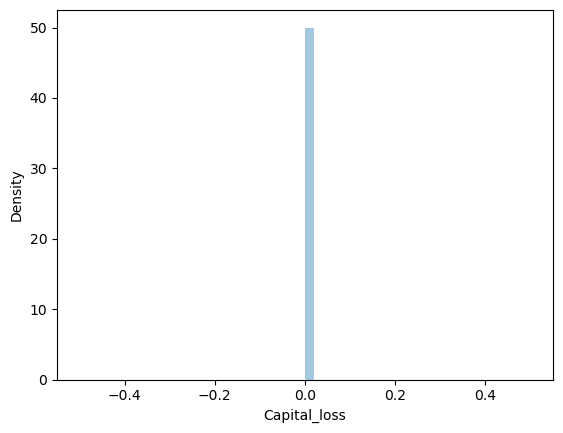

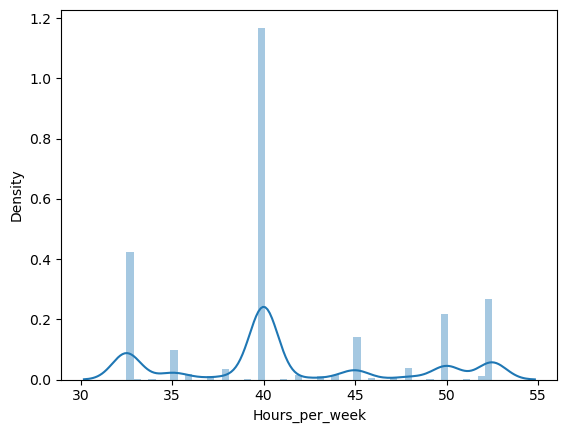

In [16]:
for i in df[numerical_cols]:
    sns.distplot(df[i],kde=True)
    plt.show()

Transformation to get rid of skewness

In [17]:
for i in df[numerical_cols]:
    df[i] = np.sqrt(df[i])

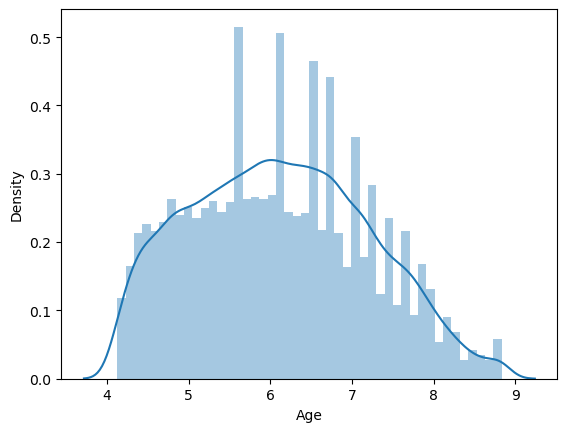

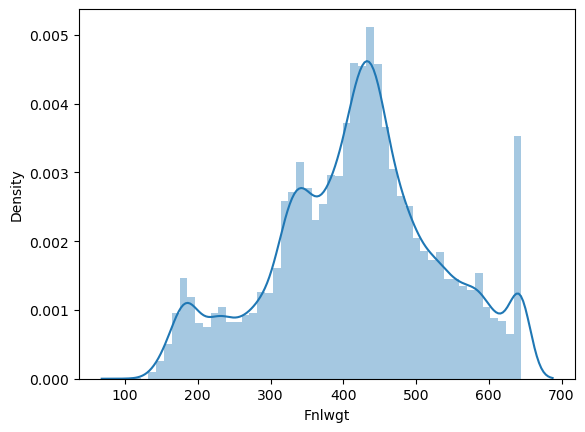

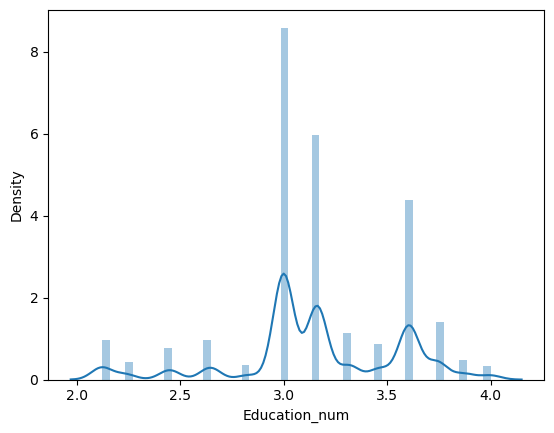

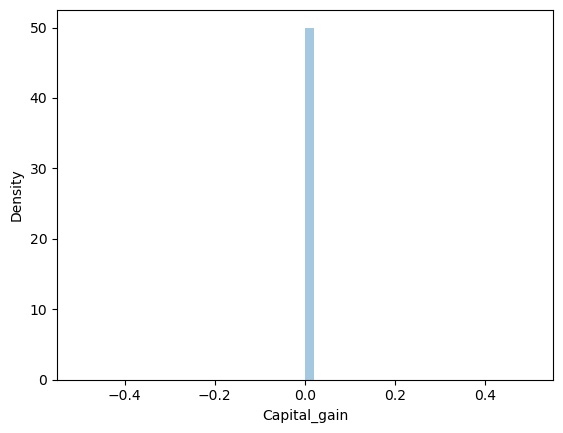

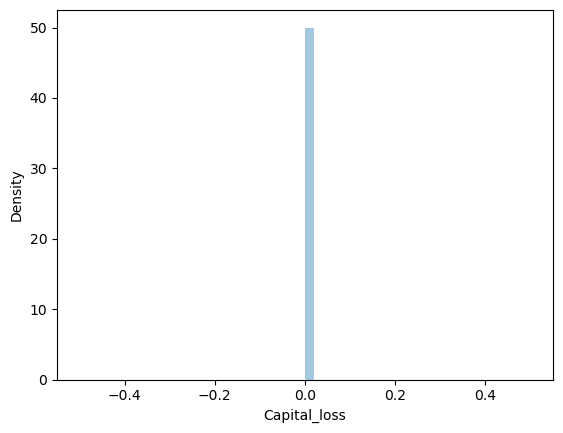

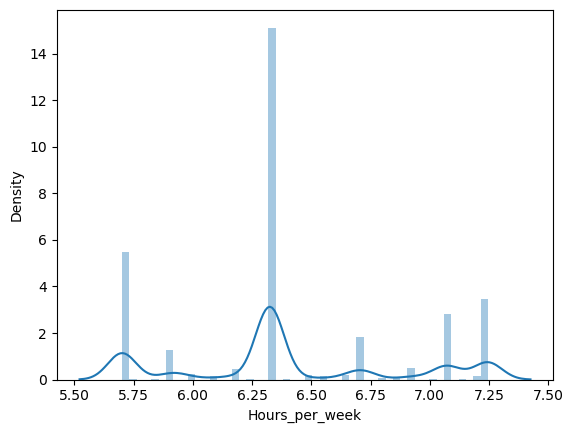

In [18]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Skewness is managed

In [19]:
df.drop(["Capital_gain","Capital_loss"],axis=1,inplace=True)

***Encoding of categorical column***

As the catrgorical data is nominal we can use nominal encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,7.071068,6,288.636450,9,3.605551,2,4,0,4,1,5.700877,39,0
1,6.164414,4,464.377002,11,3.000000,0,6,1,4,1,6.324555,39,0
2,7.280110,4,484.480134,1,2.645751,2,6,0,2,1,6.324555,39,0
3,5.291503,4,581.729318,9,3.605551,2,10,5,2,0,6.324555,5,0
4,6.082763,4,533.462276,12,3.741657,2,4,5,4,0,6.324555,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5.196152,4,507.249446,7,3.464102,2,13,5,4,0,6.164414,39,0
32556,6.324555,4,392.904569,11,3.000000,2,7,0,4,1,6.324555,39,1
32557,7.615773,4,389.756334,11,3.000000,6,1,4,4,0,6.324555,39,0
32558,4.690416,4,448.876375,11,3.000000,4,1,3,4,1,5.700877,39,0


***Check for Correlation between feautures***

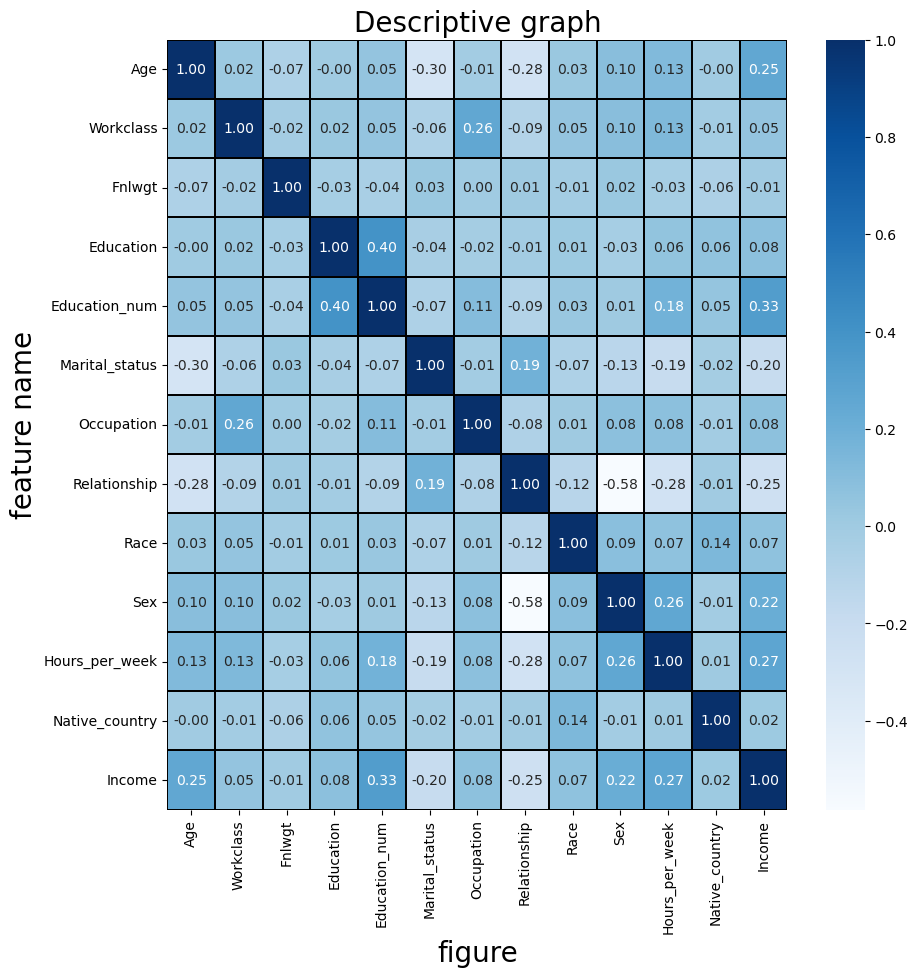

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing of VIF 
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [25]:
calc_vif(df)

,Variables,VIF FACTOR
0,Age,33.429881
1,Workclass,8.769812
2,Fnlwgt,13.555461
3,Education,9.681686
4,Education_num,76.225109
5,Marital_status,4.262459
6,Occupation,3.729069
7,Relationship,2.790995
8,Race,19.734884
9,Sex,4.735865


We can see most of the features are highly correlated with each other so some features must be dropped to prevent overfitting

In [26]:
df.drop(["Hours_per_week"],axis=1,inplace=True)

In [27]:
df.drop(["Race"],axis=1,inplace=True)

In [28]:
df.drop(["Age"],axis=1,inplace=True)

In [29]:
df.drop(["Education_num"],axis=1,inplace=True)

So correlation between features are rectified

***Checking of correlation with the target***

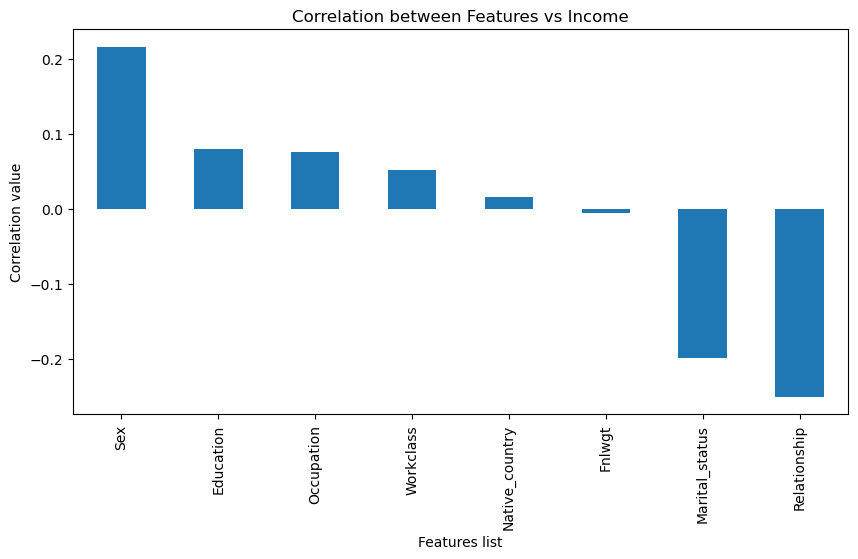

In [30]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.title("Correlation between Features vs Income")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

In [31]:
df.drop(['Native_country'],axis=1,inplace=True)

***Splitting of data into features and target***

In [32]:
x=df.drop('Income',axis=1)
y=df['Income']

In [33]:
x

,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Sex
0,6,288.636450,9,2,4,0,1
1,4,464.377002,11,0,6,1,1
2,4,484.480134,1,2,6,0,1
3,4,581.729318,9,2,10,5,0
4,4,533.462276,12,2,4,5,0
...,...,...,...,...,...,...,...
32555,4,507.249446,7,2,13,5,0
32556,4,392.904569,11,2,7,0,1
32557,4,389.756334,11,6,1,4,0
32558,4,448.876375,11,4,1,3,1


***imbalance data converting into balance data***

Income
0    24697
1     7839
Name: count, dtype: int64


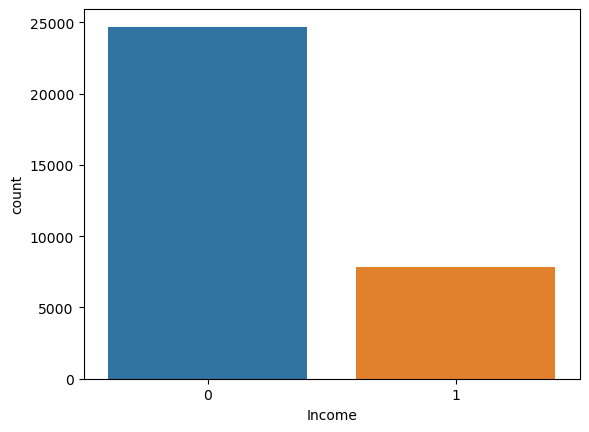

In [34]:
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

In [35]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [36]:
x,y=sm.fit_resample(x,y)

In [37]:
y.value_counts()

Income
0    24697
1    24697
Name: count, dtype: int64

***Scaling or standardization of parameters***

In [38]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 1.56959213, -1.12229102, -0.40274203, ..., -0.6510649 ,
        -0.70848445,  0.61446385],
       [ 0.10351356,  0.42260646,  0.16499791, ..., -0.16944176,
        -0.08384357,  0.61446385],
       [ 0.10351356,  0.59932877, -2.67370177, ..., -0.16944176,
        -0.70848445,  0.61446385],
       ...,
       [ 0.10351356,  0.01002168,  0.16499791, ..., -0.89187648,
        -0.70848445, -1.62743505],
       [ 0.83655285,  0.42213872,  0.16499791, ..., -0.6510649 ,
        -0.70848445,  0.61446385],
       [ 1.56959213, -0.86594809,  0.44886788, ..., -0.6510649 ,
        -0.70848445,  0.61446385]])

***Find the best random score***

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV


In [40]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.7256458012794558
random state  6


In [41]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

In [42]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.7231354765568062
Confusion matrix :
 [[3737 2368]
 [1051 5193]]
Classification report :
               precision    recall  f1-score   support

           0       0.78      0.61      0.69      6105
           1       0.69      0.83      0.75      6244

    accuracy                           0.72     12349
   macro avg       0.73      0.72      0.72     12349
weighted avg       0.73      0.72      0.72     12349

cross validation score  0.7181642662611607
The final result of accuracy minus cross validation is  0.004971210295645512


In [43]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.8298647663778443
Confusion matrix :
 [[4931 1174]
 [ 927 5317]]
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      6105
           1       0.82      0.85      0.84      6244

    accuracy                           0.83     12349
   macro avg       0.83      0.83      0.83     12349
weighted avg       0.83      0.83      0.83     12349

cross validation score  0.8274693296889939
The final result of accuracy minus cross validation is  0.0023954366888504497


In [44]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.846141387966637
Confusion matrix :
 [[5098 1007]
 [ 893 5351]]
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      6105
           1       0.84      0.86      0.85      6244

    accuracy                           0.85     12349
   macro avg       0.85      0.85      0.85     12349
weighted avg       0.85      0.85      0.85     12349

cross validation score  0.8424510867793067
The final result of accuracy minus cross validation is  0.0036903011873302694


In [45]:
clf=AdaBoostClassifier()
classify(clf,X,y)

Accuracy score 0.813750101222771
Confusion matrix :
 [[4804 1301]
 [ 999 5245]]
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      6105
           1       0.80      0.84      0.82      6244

    accuracy                           0.81     12349
   macro avg       0.81      0.81      0.81     12349
weighted avg       0.81      0.81      0.81     12349

cross validation score  0.8147551253954998
The final result of accuracy minus cross validation is  -0.0010050241727287412


In [46]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy score 0.8276783545226334
Confusion matrix :
 [[4926 1179]
 [ 949 5295]]
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      6105
           1       0.82      0.85      0.83      6244

    accuracy                           0.83     12349
   macro avg       0.83      0.83      0.83     12349
weighted avg       0.83      0.83      0.83     12349

cross validation score  0.824776653141809
The final result of accuracy minus cross validation is  0.002901701380824351


In [47]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy score 0.8244392258482468
Confusion matrix :
 [[4894 1211]
 [ 957 5287]]
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      6105
           1       0.81      0.85      0.83      6244

    accuracy                           0.82     12349
   macro avg       0.83      0.82      0.82     12349
weighted avg       0.82      0.82      0.82     12349

cross validation score  0.8096330408634905
The final result of accuracy minus cross validation is  0.014806184984756277


In [48]:
clf=SVC()
classify(clf,X,y)

Accuracy score 0.8058952141873836
Confusion matrix :
 [[4349 1756]
 [ 641 5603]]
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.71      0.78      6105
           1       0.76      0.90      0.82      6244

    accuracy                           0.81     12349
   macro avg       0.82      0.80      0.80     12349
weighted avg       0.82      0.81      0.80     12349

cross validation score  0.6686439979225446
The final result of accuracy minus cross validation is  0.13725121626483905


According to our requirements we have to check whose recall is better with better accuracy score for 1.

So out of the above models the Random Forest classifier gives the best results,the recall value is high for this model the hyperparamter tuning is done.

***Hyperparameter tuning***

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)
model = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (accuracy):", grid_search.best_score_)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score (accuracy): 0.8466729653124577


In [61]:
best_model=RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=2,min_samples_split=5)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",acc_score)
print("Confusion matrix :\n",confusion_matrix(y_test,pred))
print("Classification report :\n",classification_report(y_test,pred))

Accuracy score 0.8490566037735849
Confusion matrix :
 [[5053 1052]
 [ 812 5432]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      6105
           1       0.84      0.87      0.85      6244

    accuracy                           0.85     12349
   macro avg       0.85      0.85      0.85     12349
weighted avg       0.85      0.85      0.85     12349



In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
y_pred_prob=best_model.predict_proba(x_test)[:,1]

In [64]:
y_pred_prob

array([0.81681175, 0.97544517, 0.00146646, ..., 0.91861986, 0.0043771 ,
       0.15736586])

In [65]:
from sklearn.metrics import roc_curve

In [66]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

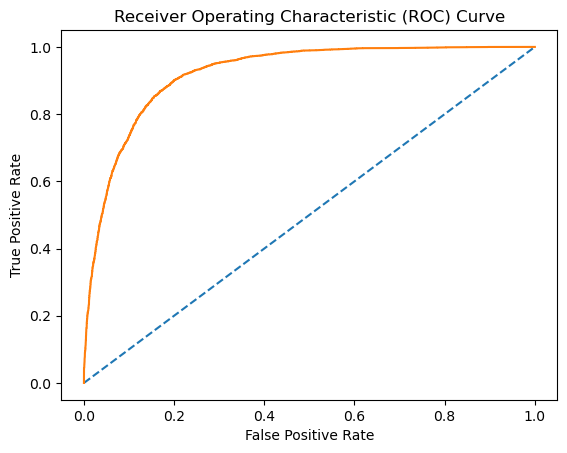

In [68]:
plt.plot([0, 1], [0, 1],linestyle='--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

So the curve is nice ...It is performing well

In [69]:
import joblib

joblib.dump(best_model, 'income.joblib')

['income.joblib']

In [70]:
x

,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Sex
0,6,288.636450,9,2,4,0,1
1,4,464.377002,11,0,6,1,1
2,4,484.480134,1,2,6,0,1
3,4,581.729318,9,2,10,5,0
4,4,533.462276,12,2,4,5,0
...,...,...,...,...,...,...,...
49389,5,356.594977,9,2,4,0,1
49390,3,541.222510,9,2,10,0,1
49391,4,417.443223,11,2,3,0,0
49392,5,464.323794,11,2,4,0,1


In [71]:
loaded_model = joblib.load('income.joblib')

In [72]:
t=np.array([4,484.480134,1,2,6,0,1])
t=t.reshape(1,-1)
loaded_model.predict(t) 

array([0])

You can see the model is giving the perfect result.